In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
material = pd.read_csv('index.csv', index_col = 0)
kk = pd.read_csv('k.csv', index_col = 0)

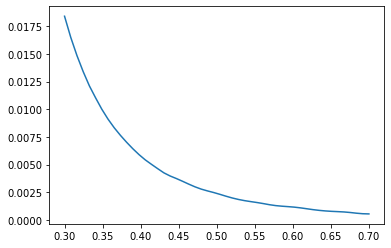

In [24]:
def Sellmeier(m, wl):
    c = material[m]
    n = (c[0] + c[1]/(1-c[2]/wl**2) + c[3]/(1-c[4]/wl**2) + c[5]/(1-c[6]/wl**2))**.5
    return n
def extinc(m, wl):
    k = kk['k_' + m]
    ww = kk['wl_' + m]
    f = interp1d(ww, k, kind ='cubic')
    return f(wl)
wl = np.linspace(0.3, 0.7)
n = Sellmeier('ITO', wl)
k = extinc('ITO', wl)
#plt.plot(wl, n)
plt.plot(wl, k)
plt.show()